In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import sympy as sy
import scipy.constants as pc
from sympy import *

In [22]:
# Funktionen
def am(werte):
    return np.mean(werte)

def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(werte):
    return std(werte)/np.sqrt(werte.size)

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def groessterBeitrag(f, werte, unsicherheiten, variablen):
    zMax = 0
    zMaxArray = np.array([])
    for i in range (werte.size):
        zMax = (np.abs(sy.diff(f, variablen[i])) * unsicherheiten[i])
        for j in range(werte.size):
            zMax = sub(zMax, variablen[j], werte[j])
        x = np.array([zMax])
        zMaxArray = np.append(zMaxArray, x)
    return variablen[np.argmax(zMaxArray)]

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (unsicherheiten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]-(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))

def print_to_table(avgs, stds, rows, cols,
                   highlight_best=True,
                   max_is_best=True,
                   avg_format='{0:!>4.1f}',
                   std_format='{1:!<4.1f}',
                   file=None,
                   col_orientation='c'):
    # Find best values
    best_avg = {}
    if highlight_best:
        if max_is_best:
            for c in cols:
                idx = np.argmax(avgs[c], axis=0)
                best_avg[c] = idx
        else:
            for c in cols:
                idx = np.argmin(avgs[c], axis=0)
                best_avg[c] = idx

    # Header
    print_str = '\\begin{tabular}{l' + (" "+col_orientation) * len(cols) + '} \hline\n'
    for c in cols:
        print_str += ' & ' + c
    print_str += ' \\\\ \n \hline'

    # Content
    for m in range(len(rows)):
        row_name = rows[m]
        print_str += '\n{0}'.format(row_name)
        for c in cols:
            print_str += ' &\n '
            print_list = [avgs[c][m]]
            print_list += [stds[c][m]]
            if m == best_avg.get(c, None):
                print_str += ('$\mathbf{{'+ avg_format + ' \\pm ' + std_format + '}}$').format(*print_list)
            else:
                print_str += ('$'+ avg_format + ' \\pm ' + std_format + '$').format(*print_list)

        print_str += "\n \\vspace*{0.0mm} \\\\"
        print_str = print_str.replace('!', '\\phantom{0}')

    # Footer
    print_str += '\n \hline \n \end{tabular}'

    # Write output
    if file is None:
        print(print_str)
    else:
        with open(file, 'w') as f:
            f.write(print_str)

In [3]:
# Erinnerungen
# x = np.array([,])
# x.size
# x, y = symbols('x y')
# expr = x*y
# expr.subs([(x, wert_x), (y, wert_y)])

In [91]:
# s(m)
m = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
              550, 600, 650, 700, 750, 800, 850, 900]) #0.1g
mess = np.array([0.44, 0.81, 1.22, 1.61, 2.02, 2.43, 2.79, 3.13, 3.60, 3.97, 
                 4.39, 4.74, 5.15, 5.52, 5.87, 6.36, 6.76, 7.11]) # 0.1
alu = np.array([0.19, 0.40, 0.57, 0.80, 0.96, 1.18, 1.39, 1.59, 1.77, 2.0, 
                2.16, 2.45, 2.58, 2.77, 2.97, 3.15, 3.38, 3.56]) # 0.1
stahl = np.array([0.07, 0.13, 0.19, 0.27, 0.32, 0.39, 0.44, 0.50, 0.57, 0.63, 
                  0.69, 0.75, 0.81, 0.89, 0.95, 1.02, 1.08, 1.14]) #0.1

# Verschiedene d
m_short = 450 # 0.1g
d = np.array([75.1, 71.3, 67.1, 63.2, 59.3, 54.7, 50.3, 46.7, 43.3, 37.1, 33.3]) # 0.1
s = np.array([0.89, 0.76, 0.65, 0.54, 0.45, 0.34, 0.29, 0.22, 0.20, 0.12, 0.07]) #0.1

# Fläche-Biege
m_short = 450 #0.1g
a_r = np.array([10.25, 10.15, 10.15, 10.10, 12.20, 10.15, 10.10, 12.10, 10.95, 10.15])/2
i_r = np.array([8.05, 7.0, 5.85, 4.0, 10.0, 0, 0, 0, 6.9, 6.8])/2
s_f = np.array([1.24, 0.94, 0.78, 0.77, 0.65, 0.69, 0.79, 0.34, 0.97, 0.76])
flaeche = pc.pi*a_r**2-pc.pi*i_r**2
biege = pc.pi*(a_r**4-i_r**4)/4

i_r_v = np.array([])
a_r_v = np.array([])

i_r_h = np.array([])
a_r_h = np.array([])

for x in range(i_r.size):
    if i_r[x] == 0:
        i_r_v = np.append(i_r[x], i_r_v)
        a_r_v = np.append(a_r[x], a_r_v)
    else:
        i_r_h = np.append(i_r[x], i_r_h)
        a_r_h = np.append(a_r[x], a_r_h)
        
flaeche_v = (pc.pi*a_r_v**2-pc.pi*i_r_v**2)/(10**6)
flaeche_h = (pc.pi*a_r_h**2-pc.pi*i_r_h**2)/(10**6)
biege_v = (pc.pi*(a_r_v**4-i_r_v**4)/4)/(10**12)
biege_h = (pc.pi*(a_r_h**4-i_r_h**4)/4)/(10**12)

Steigung Messing, Abschnitt Messing 0.00785882352941177 0.04039215686274236
Steigung Alu, Abschnitt Alu 0.003977915376676987 -0.00784313725490196
Steigung Stahl, Abschnitt Stahl 0.001258204334365325 0.004575163398692811
US Steigung Messing, Abschnitt Messing 2.6156257777424425e-05 0.014156231315015045
US Steigung Alu, Abschnitt Alu 2.0643962435583102e-05 0.011172879162738255
US Steigung Stahl, Abschnitt Stahl 6.455793704957955e-06 0.00349399022547796


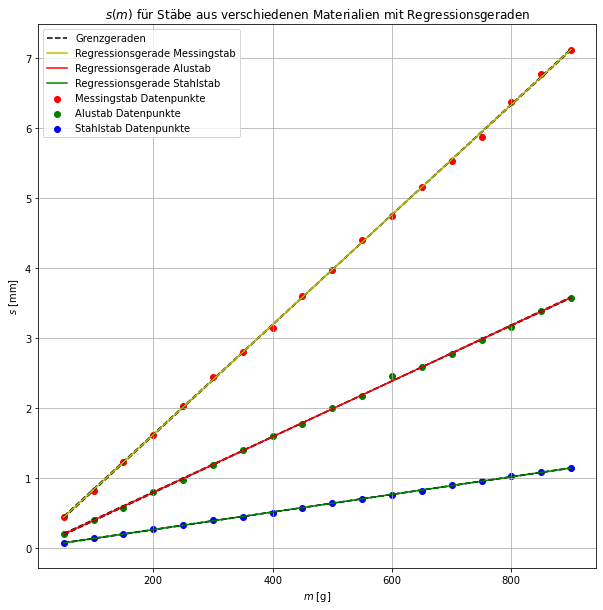

In [93]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(m, mess, color='r', label='Messingstab Datenpunkte')
ax.scatter(m, alu, color='g', label='Alustab Datenpunkte')
ax.scatter(m, stahl, color='b', label='Stahlstab Datenpunkte')

x = np.linspace(50, 900, 18)
b_mess, a_mess = bestB(m, mess), bestA(m, mess)
b_alu, a_alu = bestB(m, alu), bestA(m, alu)
b_stahl, a_stahl = bestB(m, stahl), bestA(m, stahl)

print('Steigung Messing, Abschnitt Messing', b_mess, a_mess)
print('Steigung Alu, Abschnitt Alu', b_alu, a_alu)
print('Steigung Stahl, Abschnitt Stahl', b_stahl, a_stahl)

us_b_mess, us_a_mess = stuB(m, mess), stuA(m, mess)
us_b_alu, us_a_alu = stuB(m, alu), stuA(m, alu)
us_b_stahl, us_a_stahl = stuB(m, stahl), stuA(m, stahl)

ax.plot(x, x*(b_mess+us_b_mess)+ a_mess-us_a_mess, color='black', ls='--', label='Grenzgeraden')
ax.plot(x, x*(b_mess-us_b_mess)+ a_mess+us_a_mess, color='black', ls='--')

ax.plot(x, x*(b_alu+us_b_alu)+ a_alu-us_a_alu, color='black', ls='--')
ax.plot(x, x*(b_alu-us_b_alu)+ a_alu+us_a_alu, color='black', ls='--')

ax.plot(x, x*(b_stahl+us_b_stahl)+ a_stahl-us_a_stahl, color='black', ls='--')
ax.plot(x, x*(b_stahl-us_b_stahl)+ a_stahl+us_a_stahl, color='black', ls='--')

print('US Steigung Messing, Abschnitt Messing', us_b_mess, us_a_mess)
print('US Steigung Alu, Abschnitt Alu', us_b_alu, us_a_alu)
print('US Steigung Stahl, Abschnitt Stahl', us_b_stahl, us_a_stahl)

ax.plot(x, x*b_mess+ a_mess, color='y', label='Regressionsgerade Messingstab')
ax.plot(x, x*b_alu+ a_alu, color='r', label='Regressionsgerade Alustab')
ax.plot(x, x*b_stahl+ a_stahl, color='g', label='Regressionsgerade Stahlstab')

ax.set(xlabel=r'$m$ [g]', ylabel=r'$s$ [mm]', title=r'$s(m)$ für Stäbe aus verschiedenen Materialien mit Regressionsgeraden')
ax.legend()
ax.grid()

fig.savefig("s(m).png")

# E-Modul
#A =
#E = m*g*l/(A*s)

#werte_E = np.array([]) 
#us_Ev = np.array([])
#exp_E = np.array([1, 1, 1, -1, -1])

#us_E = einfachGaussMult(us_Ev, werte, exponenten)

[ 50. 100. 150. 200. 250. 300. 350. 400. 450. 500. 550. 600. 650. 700.
 750. 800. 850. 900.]
[ 0.00666667 -0.01627451  0.00078431 -0.00215686  0.01490196  0.03196078
 -0.00098039 -0.05392157  0.02313725  0.00019608  0.0272549  -0.01568627
  0.00137255 -0.02156863 -0.0645098   0.03254902  0.03960784 -0.00333333]
[-0.00105263  0.0100516  -0.01884417  0.01226006 -0.02663571 -0.00553148
  0.00557276  0.00667699 -0.01221878  0.01888545 -0.02001032  0.07109391
  0.00219814 -0.00669763 -0.0055934  -0.02448916  0.00661507 -0.0122807 ]
[ 0.00251462 -0.0003956  -0.00330581  0.01378397  0.00087375  0.00796354
 -0.00494668 -0.0078569  -0.00076711 -0.00367733 -0.00658755 -0.00949776
 -0.01240798  0.0046818   0.00177159  0.00886137  0.00595115  0.00304094]


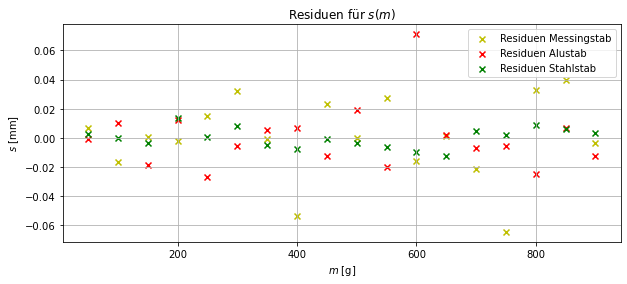

In [94]:
fig, ax = plt.subplots(figsize=(10,4))

res_mess = (mess- (x*b_mess + a_mess))
res_alu = (alu- (x*b_alu + a_alu))
res_stahl = (stahl- (x*b_stahl + a_stahl))

ax.scatter(x, res_mess, color='y', marker='x', label='Residuen Messingstab')
ax.scatter(x, res_alu, color='r', marker='x',label='Residuen Alustab')
ax.scatter(x, res_stahl, color='g', marker='x',label='Residuen Stahlstab')

print(x)
print(res_mess)
print(res_alu)
print(res_stahl)

ax.set(xlabel=r'$m$ [g]', ylabel=r'$s$ [mm]', title=r'Residuen für $s(m)$')
ax.legend()
ax.grid()

fig.savefig("s(m)_residuen.png")

2.9702625711912596
-12.924799857234758
[75.1 71.3 67.1 63.2 59.3 54.7 50.3 46.7 43.3 37.1 33.3]
[0.89 0.76 0.65 0.54 0.45 0.34 0.29 0.22 0.2  0.12 0.07]


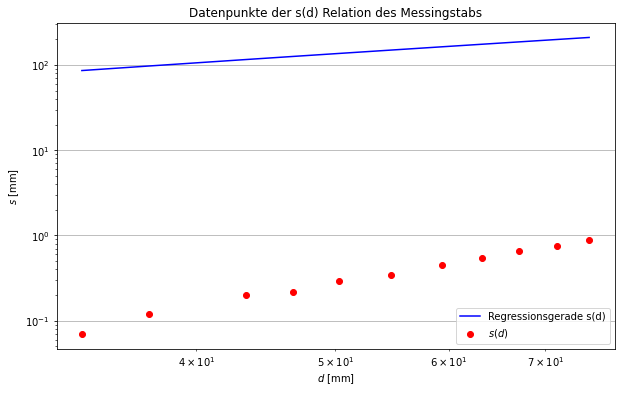

In [104]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xscale('log')
ax.set_yscale('log')

ax.scatter(d, s, color='r', label=r'$s(d)$')

a_d, b_d = bestA(np.log(d), np.log(s)), bestB(np.log(d), np.log(s))

print(b_d)
print(a_d)

ax.plot(d, d*b_d + a_d, color='b', label='Regressionsgerade s(d)')

ax.set(xlabel=r'$d$ [mm]', ylabel=r'$s$ [mm]', title='Datenpunkte der s(d) Relation des Messingstabs')
ax.legend()
ax.grid()

print(d)
print(s)

fig.savefig("s(d).png")

[9.25963893e-08 4.49508663e-08 4.58476141e-08]
[1.14990145e-04 8.01184666e-05 8.09136823e-05]
[3.66115227e-08 5.23110015e-08 5.24986842e-08 4.38450257e-08
 4.07884818e-08 3.54760386e-08 2.95413437e-08]
[4.45968712e-05 5.67783967e-05 3.83588463e-05 6.75520960e-05
 5.40353936e-05 4.24291723e-05 3.16201301e-05]


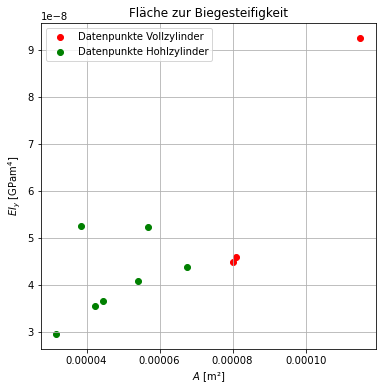

In [96]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.set_xscale('log')
#ax.set_yscale('log')

print(biege_v*88)
print(flaeche_v)


ax.scatter(flaeche_v, biege_v*88, color='r', label='Datenpunkte Vollzylinder')

ax.scatter(flaeche_h, biege_h*88, color='g', label='Datenpunkte Hohlzylinder')

ax.set(xlabel=r'$A$ [m²]', ylabel=r'$EI_y$ [GPam$^4$]', title=r'Fläche zur Biegesteifigkeit')
ax.legend()
ax.grid()

print(biege_h*88)
print(flaeche_h)

fig.savefig("flächebiege.png")

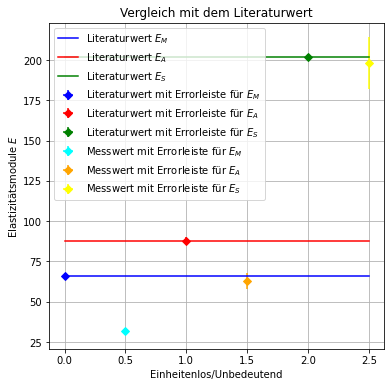

In [87]:
fig, ax = plt.subplots(figsize=(6,6))

elas_mess = 66.0
elas_alu = 88.0
elas_stahl = 202.0

elas_messm = 32
elas_alum = 63
elas_stahlm = 198

us_messm = 2
us_alum = 5
us_stahlm= 16

us_elas = 2

x = np.linspace(0,2.5,20)

ax.errorbar(0, elas_mess, xerr=0, yerr=us_elas, fmt='D', color='b', label=r'Literaturwert mit Errorleiste für $ E_M $ ')
ax.plot(x, np.full((20), elas_mess), color='b', label='Literaturwert $ E_M $')
ax.errorbar(1, elas_alu, xerr=0, yerr=us_elas, fmt='D', color='r', label=r'Literaturwert mit Errorleiste für $ E_A $ ')
ax.plot(x, np.full((20), elas_alu), color='r', label='Literaturwert $ E_A $')
ax.errorbar(2, elas_stahl, xerr=0, yerr=us_elas, fmt='D', color='g', label=r'Literaturwert mit Errorleiste für $ E_S $ ')
ax.plot(x, np.full((20), elas_stahl), color='g', label='Literaturwert $ E_S $')

ax.errorbar(0.5, elas_messm, xerr=0, yerr=us_messm, fmt='D', color='cyan', label=r'Messwert mit Errorleiste für $ E_M $ ')
ax.errorbar(1.5, elas_alum, xerr=0, yerr=us_alum, fmt='D', color='orange', label=r'Messwert mit Errorleiste für $ E_A $ ')
ax.errorbar(2.5, elas_stahlm, xerr=0, yerr=us_stahlm, fmt='D', color='yellow', label=r'Messwert mit Errorleiste für $ E_S $ ')

ax.set(xlabel=r'Einheitenlos/Unbedeutend', ylabel=r'Elastizitätsmodule $E$', title=r'Vergleich mit dem Literaturwert')
ax.legend()
ax.grid()

fig.savefig("vlit.png")

[100. 200. 300. 400. 500. 600. 700. 800. 900.]


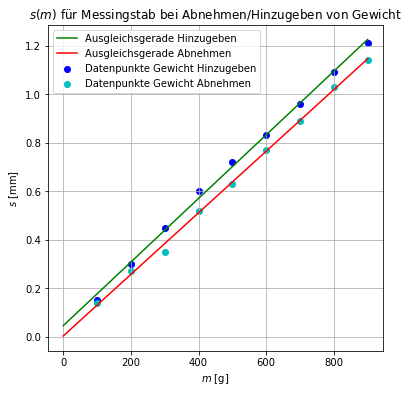

In [114]:
fig, ax = plt.subplots(figsize=(6,6))

m_hi = np.linspace(100, 900, 9)
x_hi = np.linspace(0, 900, 10)
print(m_hi)
mess_hi = np.array([0.15, 0.3, 0.45, 0.60, 0.72, 0.83, 0.96, 1.09, 1.21])
mess_ab = np.array([0.14, 0.27, 0.35, 0.52, 0.63, 0.77, 0.89, 1.03, 1.14])

ax.scatter(m_hi, mess_hi, color='b', label='Datenpunkte Gewicht Hinzugeben')
a_hi, b_hi = bestA(m_hi, mess_hi), bestB(m_hi,mess_hi)
ax.plot(x_hi,x_hi*b_hi+a_hi,color='g', label='Ausgleichsgerade Hinzugeben')

ax.scatter(m_hi, mess_ab, color='c', label='Datenpunkte Gewicht Abnehmen')
a_ab, b_ab = bestA(m_hi, mess_ab), bestB(m_hi, mess_ab)
ax.plot(x_hi,x_hi*b_ab+a_ab,color='r', label='Ausgleichsgerade Abnehmen')

ax.set(xlabel=r'$m$ [g]', ylabel=r'$s$ [mm]', title=r'$s(m)$ für Messingstab bei Abnehmen/Hinzugeben von Gewicht')
ax.legend()
ax.grid()

fig.savefig("sm_hab.png")